# IMAGE SCARPPING & CLASSIFICATION

In [1]:
# Importing Useful Libraries
import warnings 
warnings.filterwarnings("ignore")
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
# Loading all the scrapped images.

images = []
folder = r"C:\Users\Shanty\Data"

for filename in os.listdir(folder):
    try:
        img = Image.open(os.path.join(folder, filename))
        img = img.resize((224, 224))
        if img is not None:
            images.append(np.array(img))
    except:
        print('Cant import ' + filename)

# Converting the data into array
X = np.asarray(images)

In [3]:
X.shape

(707, 224, 224, 3)

In [4]:
# Loading the image dataset (csv file).
data = pd.read_csv("data.csv")

In [5]:
y = np.asarray(data)
y.shape

(707, 1)

In [6]:
# Separating the data into train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
print(X_train.shape[0])
print(X_test.shape[0])

565
142


In [8]:
len(images)

707

## VISUALIZATION

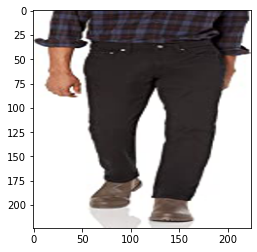

In [9]:
plt.imshow(images[56])

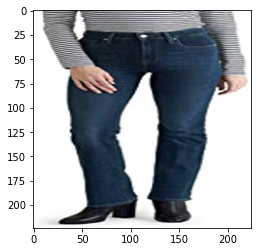

In [10]:
plt.imshow(images[76])

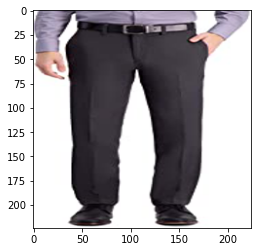

In [11]:
plt.imshow(images[516])

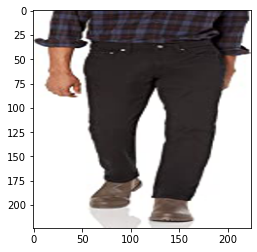

In [12]:
plt.imshow(images[56])

## MODELLING

In [13]:
# Creating the model
model=Sequential()

In [14]:
# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [15]:
# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [16]:
# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [17]:
# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [18]:
# Fifth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [19]:
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0

In [21]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(lr=0.001)

In [22]:
# Compiling the model

model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [23]:
#epochs== no of ittretion
model.fit(X_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
18/18 [==============================] - 41s 2s/step - loss: 37.6242 - accuracy: 0.3699
Epoch 2/50
18/18 [==============================] - 36s 2s/step - loss: 1.7034 - accuracy: 0.3841
Epoch 3/50
18/18 [==============================] - 36s 2s/step - loss: 1.0111 - accuracy: 0.4814
Epoch 4/50
18/18 [==============================] - 36s 2s/step - loss: 0.9999 - accuracy: 0.4832
Epoch 5/50
18/18 [==============================] - 36s 2s/step - loss: 0.8745 - accuracy: 0.5752
Epoch 6/50
18/18 [==============================] - 36s 2s/step - loss: 0.7642 - accuracy: 0.6177
Epoch 7/50
18/18 [==============================] - 36s 2s/step - loss: 0.7487 - accuracy: 0.6248
Epoch 8/50
18/18 [==============================] - 36s 2s/step - loss: 0.7167 - accuracy: 0.6442
Epoch 9/50
18/18 [==============================] - 36s 2s/step - loss: 0.6404 - accuracy: 0.6903
Epoch 10/50
18/18 [==============================] - 36s 2s/step - loss: 0.6203 - accuracy: 0.6832
Epoch 11/50
18/18 

## MODEL EVALUATION 

In [24]:
# Evaluating the model

prediction = model.evaluate(x = X_test, y = y_test, verbose=1)
print ("Loss = " + str(prediction[0]))
print ("Test Accuracy = " + str(prediction[1]))

5/5 [==============================] - 3s 450ms/step - loss: 0.5292 - accuracy: 0.8310
Loss = 0.5292313694953918
Test Accuracy = 0.8309859037399292


## SAVING THE MODEL

In [25]:
# Saving the model.
model.save('Image_classification_org.h5')